# Title goes here

**Author:** Elimelech Berlin  
**Date:** March 2023
***

### Overview
This report analyzes available data to identify home features that have a strong correlation with home sale prices. Included in this data is information about home features such as living space, utilities ...
***

### Business Problem
Investors looking to turn a profit from flipping houses are presented with the following dilemma: With a finite amount of funds to invest per property, how should they spend their money to maximize their return? What home features are associated with an increase in home value?  
In this report I explore a given dataset to pinpoint what sort of renovations/improvements investors would be advised to spend their money on in an effort to maximize a given home's resail value.
***

### Data
The data examined in this report describes properties located in King County, Washington and comes from the King County Assessor Data Download available from the [King County Department of Assesments webpage](https://info.kingcounty.gov/assessor/DataDownload/default.aspx). (Some of the properties are located outside of the county proper).  
This dataset contains information about a variety of home/property features of about 30,000 properties. Features described include general details (location, view from the home etc.) as well as details about the actual structure and layout (square-footage, utilities etc.) of the properties.  
In creating this report the following two files were used:
* [kc house data.csv](https://github.com/terminalcoder/dsc-phase-2-project-v2-5/blob/main/data/kc_house_data.csv) contains the dataset 
* [column names.md](https://github.com/terminalcoder/dsc-phase-2-project-v2-5/blob/main/data/column_names.md) contains descriptive information about each column in the dataset
***

In [46]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

To get started, have a look at the data:

In [47]:
# load dataset from file & preview it
kc_house_data = pd.read_csv('data/kc_house_data.csv')
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


#### Data Preparation
Neaten the data to prepare for analysis

In [48]:
# create list of columns to ignore (drop) in this report
col_to_ignore = ['date', 'view', 'sqft_above', 'address', 'lat', 'long']

# drop those columns
kc_house_data.drop(col_to_ignore, axis=1, inplace=True)

In [49]:
# get a sense of the distributios of the features
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,476.039396,330.211142,217.412038,1975.163953,90.922301
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,579.631302,285.770536,245.302792,32.067362,416.473038
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,0.000000,1900.000000,0.000000
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,0.000000,40.000000,1953.000000,0.000000
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,0.000000,400.000000,150.000000,1977.000000,0.000000
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,940.000000,510.000000,320.000000,2003.000000,0.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000


In [50]:
# check for null values
kc_house_data.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
dtype: int64

In [51]:
# drop rows with null values for ease of use
kc_house_data.dropna(inplace=True)

### Data Analysis

As this report aims to identify ways in which properties can be renovated or improved to maximize resale value, I will examine the data using the home features other than price as predictor variables and the target variable will be price.

First, get a sense of how each variable is independently correlated with the target variable:

In [52]:
# check correlation of numerical features with price, in descending order
kc_house_data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608616
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
id              -0.034096
Name: price, dtype: float64

From the above output we see that square feet of living space is the feature most highly correlated with price.  
Let's begin our investigation with that feature.  
To get a sense of things, create a visualization of square-footage vs. price:

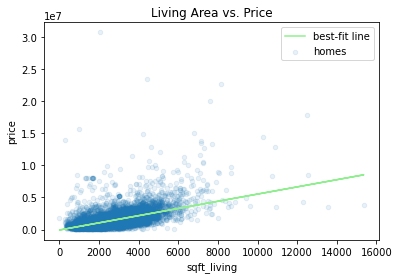

In [53]:
# plot sqft_living vs. price
kc_house_data.plot.scatter(x='sqft_living', y='price', alpha=.1, label='homes')
plt.title('Living Area vs. Price')

# add best-fit line to the plot
a, b = np.polyfit(kc_house_data['sqft_living'], kc_house_data['price'], 1)
plt.plot(kc_house_data['sqft_living'], a*kc_house_data['sqft_living']+b, color= 'lightgreen', label='best-fit line')
plt.legend();

Unsurprisingly, there is a visible correlation between the predictor of square-feet of living space & home sale price as indicated by the upward slope of the mass of data points.

#### Regression Modeling
To truly understand the relationship between these two features let's build a linear regression model:

Before setting up the model, consider that some of the assumptions for linear regression are met:
* Linearity: in the above scatterplot their appears to be a linear relationship between the variables.
* Independence: There seems to be no reason to suspect autocorrelation for this dataset

In [61]:
# set variables for the model
X_baseline = kc_house_data['sqft_living']
y = kc_house_data['price']

# create model
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

In [57]:
# view summary of the results
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:27:43   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Evaluation
The overall model is statistically significant with a p-value of (nearly) 0.
The R-squared value indicates that 37% of the variance in the data is explained by the sqft_living feature.  


### Coefficients Interpetation:
The coefficients for the constant and the sqft_living feature have p-values well below an alpha of 0.05, indicating statistical significance.

* A home with 0 square-feet of living space would have a sale price of $-75,590.

* The price of a home increases by $561 per each additional square-foot of living space.

### Test Assumptions
To see if the above model is a good interpetation of the data, let's analyze this model to see if it meets the assumptions for linear regression.

Check for homoscedasticity:

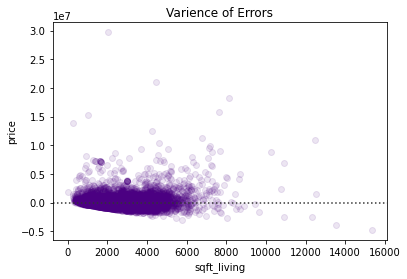

In [187]:
# plot residuals
sns.residplot(x=X_baseline, y=y, color='indigo', scatter_kws={'alpha': .1})
plt.title('Varience of Errors');

Check for normality in the distribution of the residuals with a qq-plot:

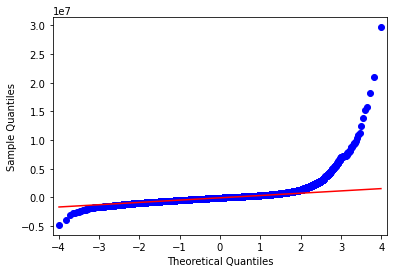

In [102]:
# plot qq-plot
sm.qqplot(data = baseline_results.resid, line = 'q', dist = stats.norm);

From the above plot we see that the model's errors are not normaly distributed at the two ends.  
Let's log transform the target variable & view a qq-plot for the new model:

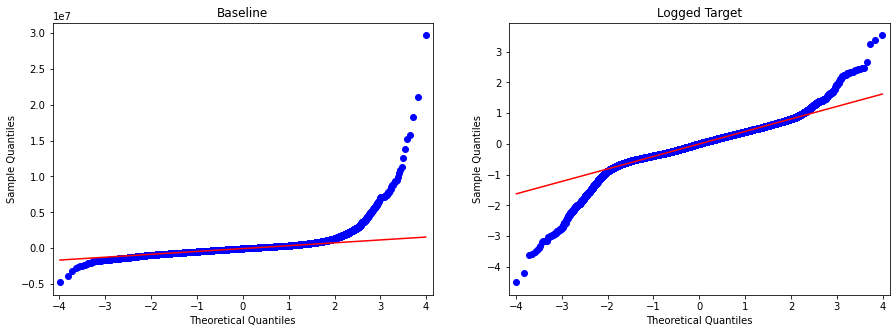

In [152]:
# log transform y
log_y = np.log(kc_house_data['price'])

# create new model with the transformed data
log_trg_model = sm.OLS(log_y, sm.add_constant(X_baseline))
log_trg_results = log_trg_model.fit()

# visualize the distributions of the residuals of the new model vs. normal distribution
fig, axes = plt.subplots(figsize=(15, 5), ncols = 2)
sm.qqplot(log_trg_results.resid, line = 'q', dist = stats.norm, ax=axes[1])
sm.qqplot(data = baseline_results.resid, line = 'q', dist = stats.norm, ax=axes[0])
axes[0].set_title('Baseline')
axes[1].set_title('Logged Target');

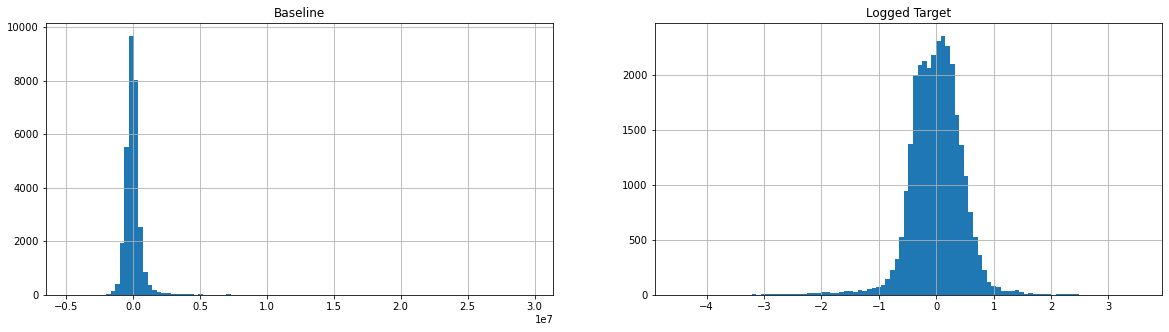

In [154]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=2)

log_trg_results.resid.hist(ax = axes[1], bins= 100,)
baseline_results.resid.hist(ax = axes[0], bins = 100)
axes[0].set_title('Baseline')
axes[1].set_title('Logged Target');

The logged target model appears to be more normally distributed than the original model.  
View the summary of the logged transformed target model:

In [138]:
# display summry of logged target model results
log_trg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.900e+04
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:39:27   Log-Likelihood:                -19063.
No. Observations:               30111   AIC:                         3.813e+04
Df Residuals:                   30109   BIC:                         3.815e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9496      0.006   2062.757      0.000      12.937      12.962
sqft_living     0.0004    2.7e-06    137.836      0.000       0.000       0.000
==============================================================================
Omnibus:                     5867.888   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49915.366
Skew:                          -0.700   Prob(JB):                         0.00
Kurtosis:                       9.150   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model Evaluation & Interpetation
This model has a slightly improved R-squared value compared to the baseline model, it explains 39% of the variance in the data, about 2% more than the baseline model. (It's p-value is lower than an alpha of 0.05, allowing us to attribute statistical significance to the model.)

#### Coefficients Interpetation
The coefficients for the constant and the sqft_living feature have p-values well below an alpha of 0.05, indicating statistical significance.

* A home with 0 square-feet of living space would have a sale price of...

* The price of a home increases by...

#### Assumptions
Check for homoscedasticity:

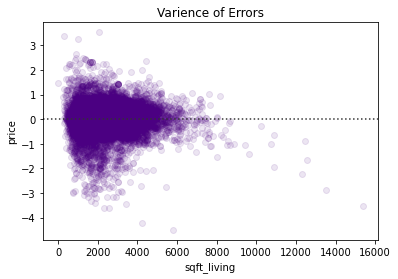

In [186]:
# create scatterplot of residuals
sns.residplot(x=X_baseline, y=log_y, color='indigo', scatter_kws={'alpha': .1})
plt.title('Varience of Errors');

From the uneven shape of the mass of datapoints (narrows as sqft_living increases), it's clear that this data doesn't meet the linear regression assumption of homoscedasticity. This means that the summary data generated above for this model is not as accurate as it seems (the true coefficient, p-value etc. of the independent variable may not be what was returned by the model).

### Multiple Linear Regression Modeling
Add more predictor variables

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

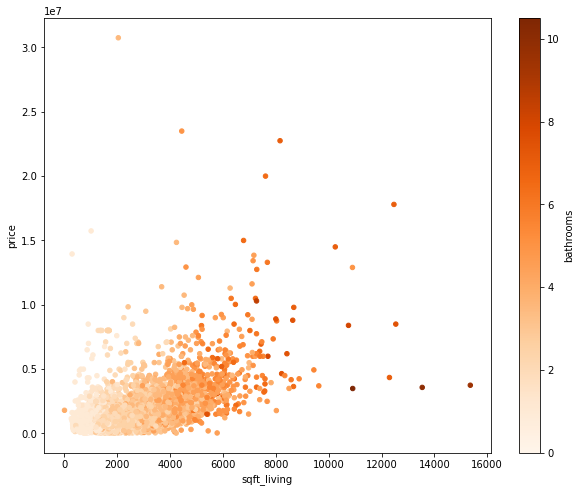

In [201]:
# add another feature to the scatterplot to get an idea of what to include in the next model
fig, ax = plt.subplots(figsize=(10, 8))
kc_house_data.plot.scatter(x = 'sqft_living', y = 'price', ax=ax, c='bathrooms', cmap='Oranges')
;

**Assumptions: linearity (the relationship between x & y is linear), independence (no multicollinearity, errors are not related), normality of residuals (errors are normally distribued), equal variance of errors (homoscedasticity)**

## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:
